### **1. Extracción del Archivo Tratado**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/egcasass/Challenge-Telcom-X-Parte2/main/datos_tratados.csv'
df = pd.read_csv(url)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


### **2. Eliminación de Columnas Irrelevantes**

In [ ]:
df = df.drop(['customerID'], axis=1)

### **3. Encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [ ]:
df.describe(include='O')

,gender,Contract,PaymentMethod
count,7267,7267,7267
unique,2,3,4
top,Male,Month-to-month,Electronic check
freq,3675,4005,2445


In [ ]:
columnas_categoricas = ['gender', 'Contract', 'PaymentMethod']

datos_codificados = pd.get_dummies(data=df,columns=columnas_categoricas, dtype=int)
datos_codificados.sample(5)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Charges.Total,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
2217,0,0,1,0,18,1,1,1,0,0,...,1691.90,0,1,1,0,0,0,0,1,0
4634,0,0,0,0,53,1,0,0,0,0,...,1049.60,1,0,0,0,1,0,1,0,0
1858,1,1,0,0,9,1,1,1,0,0,...,746.50,0,1,1,0,0,0,0,1,0
3288,0,1,1,0,45,1,1,0,0,0,...,1174.35,0,1,0,1,0,0,1,0,0
3803,0,0,0,0,53,1,0,1,0,1,...,4348.10,0,1,1,0,0,0,0,0,1


In [ ]:
datos_codificados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Charges.Total,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,...,7256.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.782441,0.285950,0.344571,...,2280.634213,0.494289,0.505711,0.551122,0.209027,0.239851,0.218660,0.215770,0.336452,0.229118
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.412614,0.451897,0.475261,...,2268.632997,0.500002,0.500002,0.497414,0.406642,0.427022,0.413366,0.411384,0.472528,0.420294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,400.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1391.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3785.300000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **4. Verificación de la Proporción de Cancelación (Churn)**



In [ ]:
conteo = datos_codificados['Churn'].value_counts()
proporcion = datos_codificados['Churn'].value_counts(normalize=True)

print(f'Conteo por clase: {conteo}')
print(f'Proporción por clase: {proporcion}')

Conteo por clase: Churn
0    5398
1    1869
Name: count, dtype: int64
Proporción por clase: Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


Hay una diferencia marcada 74% para clase 0 y 26% para la clase 1, lo que indica un **desbalance moderado**.
Esto podría impactar en modelos predictivos

###**5. Balanceo de Clases (opcional)**

In [ ]:
# Conteo de NaN por columna
faltantes = df.isna().sum()

# Filtrar solo columnas con al menos 1 NaN
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

print('Columnas con valores faltantes')
print(faltantes)

# Proporción de NaN sobre el total de filas
print('\nProporción de NaN por columna')
print((faltantes / len(df)).sort_values(ascending=False))


Columnas con valores faltantes
Charges.Total    11
dtype: int64

Proporción de NaN por columna
Charges.Total    0.001514
dtype: float64


In [ ]:
# Tratamiento para Charges.Total NaN a 0
df['Charges.Total'].fillna(0, inplace=True)

/tmp/ipython-input-3521005980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(0, inplace=True)


In [ ]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn                           7267 non-null   int64  
 1   SeniorCitizen                   7267 non-null   int64  
 2   Partner                         7267 non-null   int64  
 3   Dependents                      7267 non-null   int64  
 4   tenure                          7267 non-null   int64  
 5   PhoneService                    7267 non-null   int64  
 6   MultipleLines                   7267 non-null   int64  
 7   InternetService                 7267 non-null   int64  
 8   OnlineSecurity                  7267 non-null   int64  
 9   OnlineBackup                    7267 non-null   int64  
 10  DeviceProtection                7267 non-null   int64  
 11  TechSupport                     7267 non-null   int64  
 12  StreamingTV                     72

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = datos_codificados.drop(columns='Churn',axis=1)
y = datos_codificados.Churn

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# === 0) NO modificar X original ===
X_orig = X.copy()

# === 1) Detectar tipos de columnas ===
cols_cat = X_orig.select_dtypes(include=['object', 'category']).columns.tolist()
cols_num = X_orig.select_dtypes(exclude=['object', 'category']).columns.tolist()

# === 2) Imputación (sin mutar X) ===
imp_num = SimpleImputer(strategy='median')
X_num = imp_num.fit_transform(X_orig[cols_num]) if cols_num else np.empty((len(X_orig), 0))

imp_cat = SimpleImputer(strategy='most_frequent')
X_cat_imp = imp_cat.fit_transform(X_orig[cols_cat]) if cols_cat else np.empty((len(X_orig), 0))

# === 3) One-Hot Encoding robusto a versiones ===
try:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

X_cat_ohe = ohe.fit_transform(X_cat_imp) if cols_cat else np.empty((len(X_orig), 0))

# Nombres de columnas resultantes
ohe_cols = list(ohe.get_feature_names_out(cols_cat)) if cols_cat else []
final_cols = cols_num + ohe_cols

# === 4) Ensamble DataFrame preprocesado (todo numérico, sin NaN) ===
X_pre = np.hstack([X_num, X_cat_ohe]) if (cols_num or cols_cat) else np.empty((len(X_orig), 0))
X_pre_df = pd.DataFrame(X_pre, columns=final_cols, index=X_orig.index)

# Diagnóstico previo
print("Diagnóstico previo a SMOTE")
print(" - Formas:", X_pre_df.shape, y.shape)
print(" - NaN en X_pre_df:", int(np.isnan(X_pre_df.values).sum()))
print(" - Conteo clases (y):")
print(y.value_counts())

# === 5) SMOTE (balanceo de clases) ===
from imblearn.over_sampling import SMOTE
from collections import Counter

minor = min(Counter(y).values())
k = max(1, min(5, minor - 1))  # k_neighbors < tamaño de la clase minoritaria
sm = SMOTE(random_state=42, k_neighbors=k)

X_balanceada, y_balanceada = sm.fit_resample(X_pre_df, y)
X_balanceada_df = pd.DataFrame(X_balanceada, columns=X_pre_df.columns)

# Diagnóstico posterior
print("\nDespués de SMOTE")
print(" - Formas:", X_balanceada_df.shape, y_balanceada.shape)
print(" - Conteo clases balanceadas:")
print(pd.Series(y_balanceada).value_counts())


Diagnóstico previo a SMOTE
 - Formas: (7267, 25) (7267,)
 - NaN en X_pre_df: 0
 - Conteo clases (y):
Churn
0    5398
1    1869
Name: count, dtype: int64

Después de SMOTE
 - Formas: (10796, 25) (10796,)
 - Conteo clases balanceadas:
Churn
0    5398
1    5398
Name: count, dtype: int64


### **6. Normalización o Estandarización (si es necesario)**

In [ ]:
df.describe().T[['min', 'max']]


,min,max
Churn,0.00,1.00
SeniorCitizen,0.00,1.00
Partner,0.00,1.00
Dependents,0.00,1.00
tenure,0.00,72.00
PhoneService,0.00,1.00
MultipleLines,0.00,1.00
InternetService,0.00,1.00
OnlineSecurity,0.00,1.00
OnlineBackup,0.00,1.00


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalización MinMax
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


### **7. Análisis de Correlación**

In [ ]:
# Calcular matriz de correlación
corr_matrix = datos_codificados.corr()

# Correlación de cada variable con Churn (ordenada de mayor a menor en valor absoluto)
correlacion_churn = corr_matrix["Churn"].drop("Churn").sort_values(key=abs, ascending=False)
print("Correlación con Churn:")
print(correlacion_churn)

# Detectar pares de variables con alta correlación (> 0.75) entre independientes
umbral = 0.75
pares_altos = []

for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx and abs(corr_matrix.loc[col, idx]) > umbral:
            pares_altos.append((col, idx, corr_matrix.loc[col, idx]))

# Eliminar duplicados (A,B) y (B,A)
pares_unicos = list(set(tuple(sorted([a, b])) + (c,) for a, b, c in pares_altos))

print("\nPosibles pares con multicolinealidad (>|0.75|):")
for par in pares_unicos:
    print(f"{par[0]} - {par[1]}: {par[2]:.2f}")


Correlación con Churn:
Contract_Month-to-month           0.395584
tenure                           -0.344079
Contract_Two year                -0.295138
PaymentMethod_Electronic check    0.294626
InternetService                   0.224051
Charges.Total                    -0.194440
Charges.Monthly                   0.189866
PaperlessBilling                  0.186666
Contract_One year                -0.173958
OnlineSecurity                   -0.166828
Dependents                       -0.161384
TechSupport                      -0.160440
Partner                          -0.148546
SeniorCitizen                     0.146733
PaymentMethod_Credit card        -0.131085
PaymentMethod_Bank transfer      -0.114767
PaymentMethod_Mailed check       -0.090061
OnlineBackup                     -0.080163
DeviceProtection                 -0.063452
StreamingTV                       0.062430
StreamingMovies                   0.060586
MultipleLines                     0.039343
PhoneService                   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

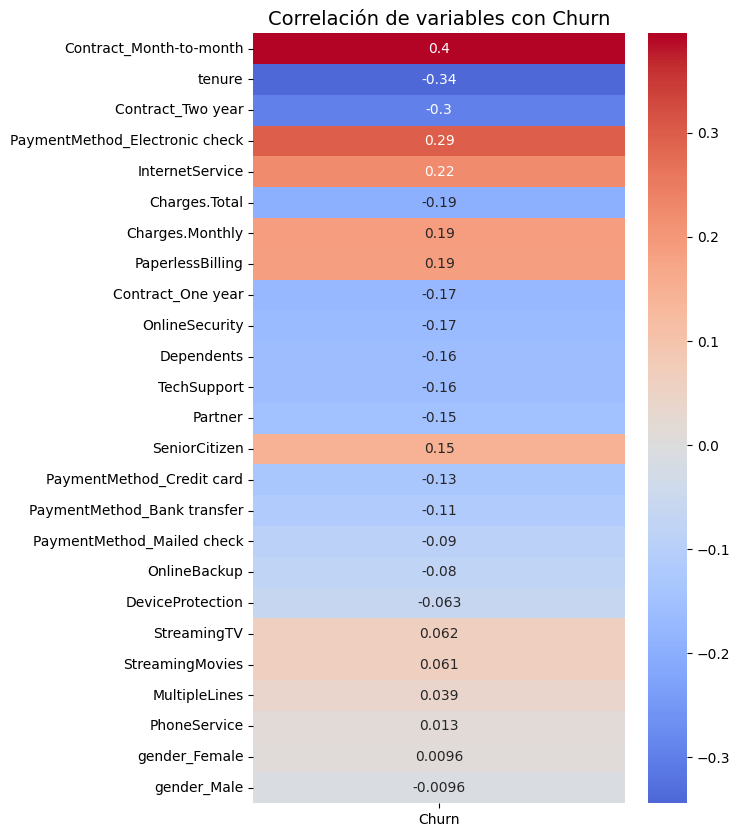

In [ ]:
# Heatmap de correlación con Churn
plt.figure(figsize=(6, len(correlacion_churn) * 0.4))
sns.heatmap(
    correlacion_churn.to_frame(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlación de variables con Churn", fontsize=14)
plt.show()


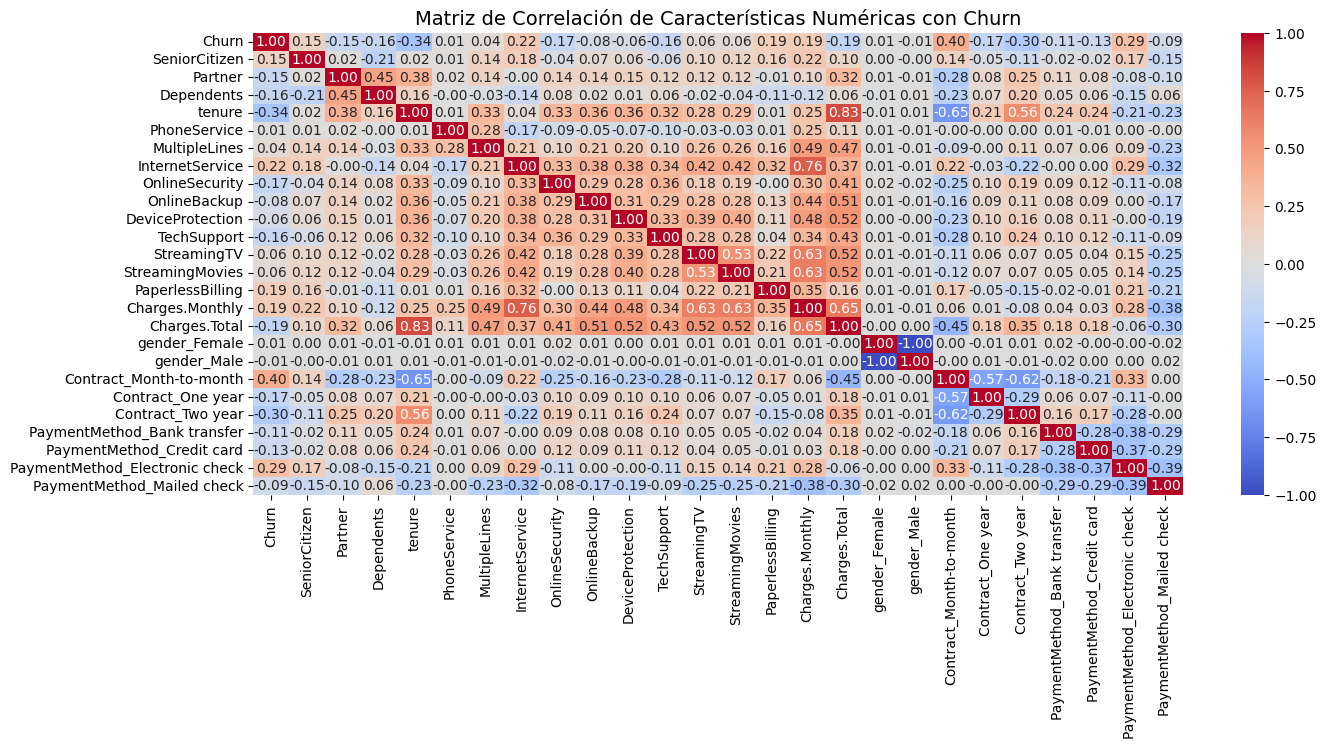

In [ ]:
# Matriz de Correlación de Características Numéricas con Churn
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de Características Numéricas con Churn", fontsize=14)
plt.show()

### **8. Análisis Dirigido**



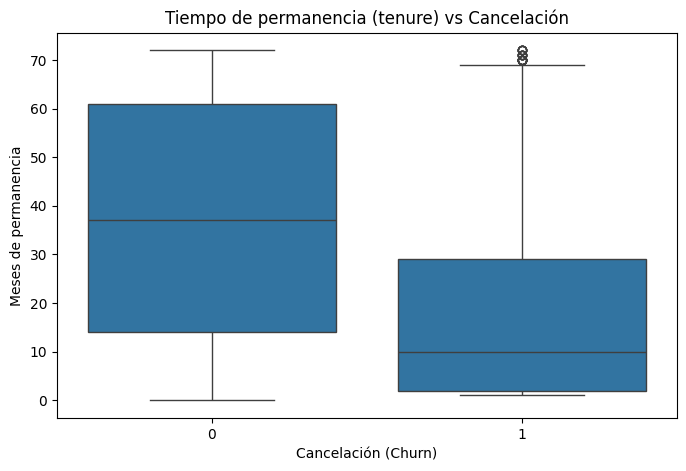

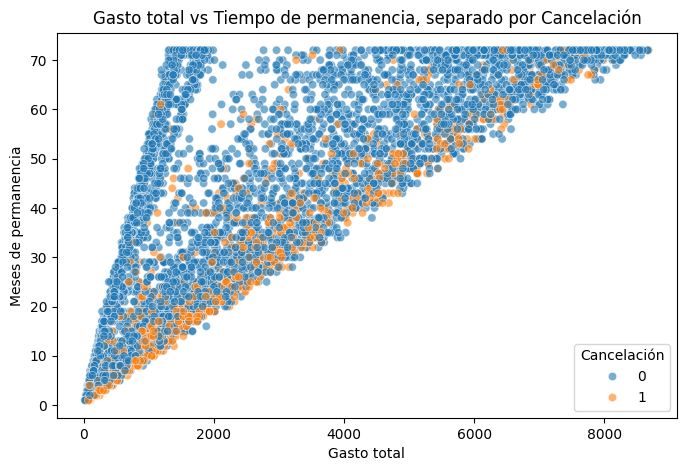

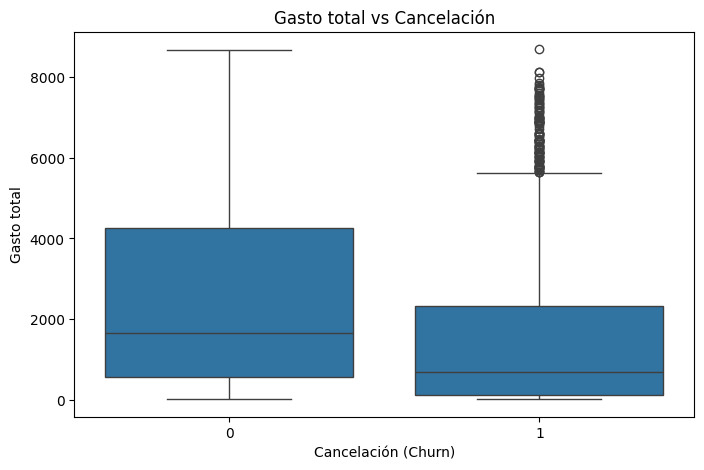

In [ ]:
# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=datos_codificados)
plt.title("Tiempo de permanencia (tenure) vs Cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Meses de permanencia")
plt.show()

# Scatter plot: Gasto total vs Cancelación
plt.figure(figsize=(8,5))
sns.scatterplot(x='Charges.Total', y='tenure', hue='Churn', data=datos_codificados, alpha=0.6)
plt.title("Gasto total vs Tiempo de permanencia, separado por Cancelación")
plt.xlabel("Gasto total")
plt.ylabel("Meses de permanencia")
plt.legend(title="Cancelación")
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Total', data=datos_codificados)
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Gasto total")
plt.show()


El tiempo de permanencia está fuertemente asociado con la probabilidad de cancelación. Los clientes nuevos o con poca antigüedad son mucho más propensos a cancelar que los clientes de largo plazo.

### **9. Separación de Datos**

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Confirmar tamaños
print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)


Tamaño conjunto de entrenamiento: (5086, 25)
Tamaño conjunto de prueba: (2181, 25)


### **10. Creación de Modelos**

**Baseline**

In [ ]:
from sklearn.dummy import DummyClassifier

# Modelo de referencia - Baseline
dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.620816139385603

**Helpers de evaluación**

In [ ]:
# Imports mínimos si no los tienes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Detectar tipos (X_train debe ser DataFrame)
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()

# OHE compatible con distintas versiones de sklearn
def make_ohe():
    ohe = OneHotEncoder(handle_unknown='ignore')
    try:
        ohe.set_params(sparse_output=False)
    except Exception:
        ohe.set_params(sparse=False)
    return ohe


**Regresión Logística**

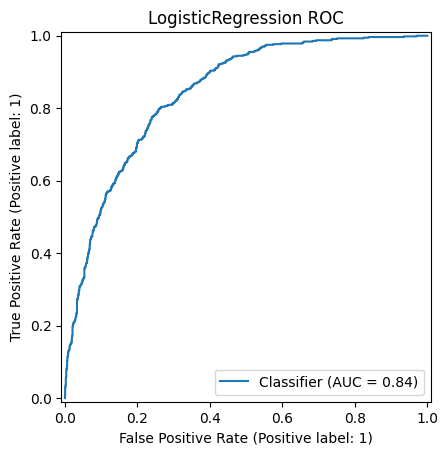

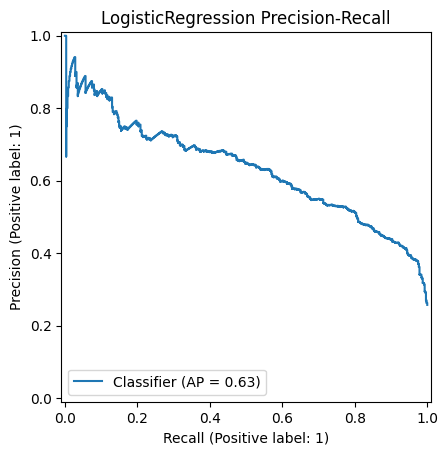

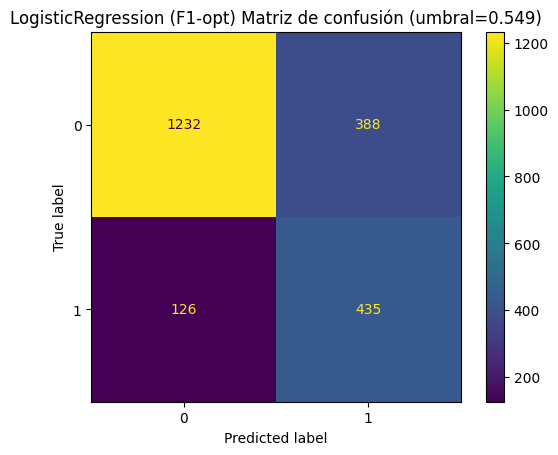

,Modelo,Umbral,Accuracy,Precision,Recall,F1,AUC_ROC,AUPRC
1,LogisticRegression,0.5489,0.764328,0.528554,0.775401,0.628613,0.842902,0.633232
0,LogisticRegression,0.5000,0.741862,0.498899,0.807487,0.616746,0.842902,0.633232
2,LogisticRegression,0.0050,0.257221,0.257221,1.000000,0.409190,0.842902,0.633232


In [ ]:
from sklearn.linear_model import LogisticRegression

# Preprocesamiento: num (median + scaler), cat (mode + OHE)
prep_norm = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imp', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())]),
         num_cols),
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('ohe', make_ohe())]),
         cat_cols),
    ],
    remainder='drop'
)

log_reg_model = Pipeline([
    ('prep', prep_norm),
    ('clf', LogisticRegression(random_state=42, solver='liblinear',
                               max_iter=1000, class_weight='balanced'))
])

log_reg_model.fit(X_train, y_train)
p_log = log_reg_model.predict_proba(X_test)[:, 1]

# Usa tu helper existente
res_log, th_log = resumen_modelo("LogisticRegression", y_test, p_log, recall_objetivo=0.60)

# Visuales (si ya cargaste tus helpers de plotting)
plot_roc_pr(y_test, p_log, title_prefix="LogisticRegression")
plot_confusion_at_threshold(y_test, p_log, th_log["thr_f1"], title_prefix="LogisticRegression (F1-opt)")
display(pd.DataFrame(res_log).sort_values('F1', ascending=False))


**Random Forest**

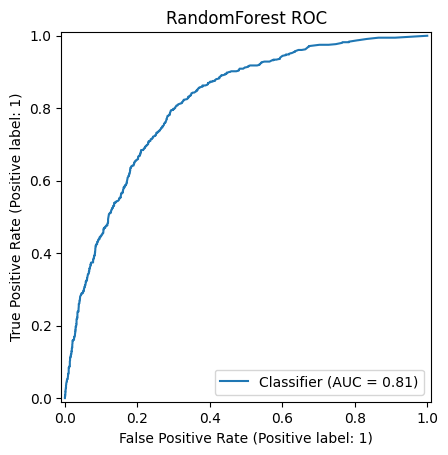

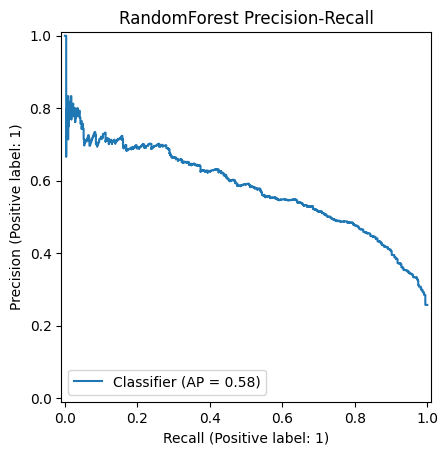

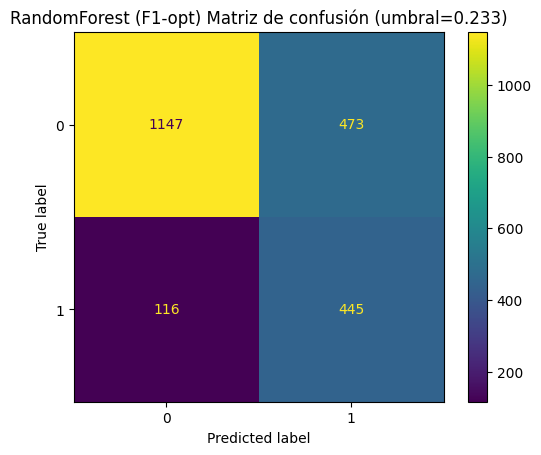

,Modelo,Umbral,Accuracy,Precision,Recall,F1,AUC_ROC,AUPRC
1,RandomForest,0.2325,0.729940,0.484749,0.793226,0.601758,0.814432,0.579355
0,RandomForest,0.5000,0.782669,0.602837,0.454545,0.518293,0.814432,0.579355
2,RandomForest,0.0000,0.257221,0.257221,1.000000,0.409190,0.814432,0.579355


,feature,importance
0,Charges.Monthly,0.178219
1,Charges.Total,0.166228
2,tenure,0.143480
3,Contract_Month-to-month,0.097010
4,Contract_Two year,0.041255
5,PaymentMethod_Electronic check,0.037762
6,PaperlessBilling,0.026365
7,InternetService,0.024228
8,TechSupport,0.022023
9,Partner,0.021533


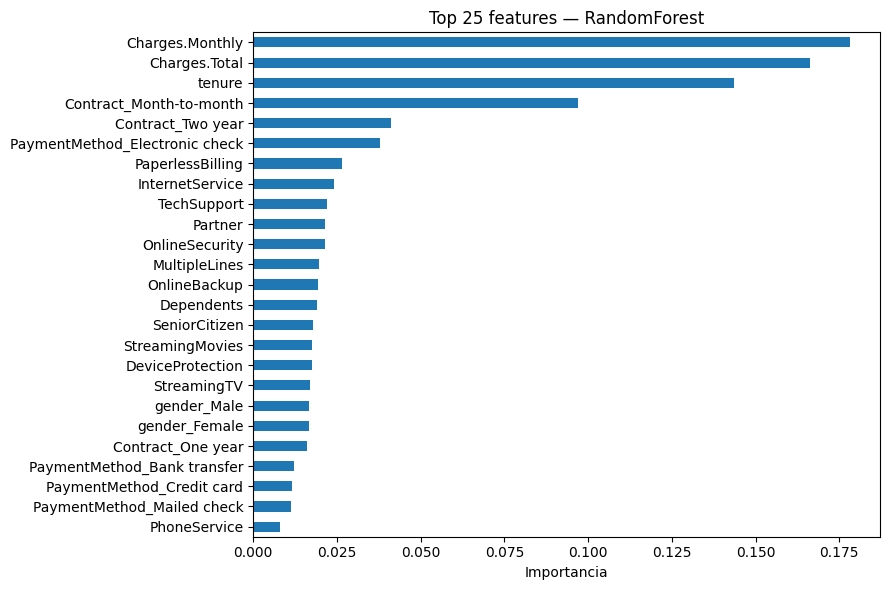

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Preprocesamiento: num (median), cat (mode + OHE) — sin scaler
prep_no_norm = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imp', SimpleImputer(strategy='median'))]), num_cols),
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('ohe', make_ohe())]), cat_cols),
    ],
    remainder='drop'
)

rf_model = Pipeline([
    ('prep', prep_no_norm),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42,
                                   class_weight='balanced_subsample', n_jobs=-1))
])

rf_model.fit(X_train, y_train)
p_rf = rf_model.predict_proba(X_test)[:, 1]

# Usa tu helper existente
res_rf, th_rf = resumen_modelo("RandomForest", y_test, p_rf, recall_objetivo=0.60)

# Visuales
plot_roc_pr(y_test, p_rf, title_prefix="RandomForest")
plot_confusion_at_threshold(y_test, p_rf, th_rf["thr_f1"], title_prefix="RandomForest (F1-opt)")
display(pd.DataFrame(res_rf).sort_values('F1', ascending=False))

# === Top 25 importancias (post-OHE) ===
try:
    ohe = rf_model.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
    cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()
except Exception:
    cat_feature_names = []

feature_names = list(num_cols) + cat_feature_names
importances = pd.Series(rf_model.named_steps['clf'].feature_importances_, index=feature_names)

top25 = importances.sort_values(ascending=False).head(25)
display(top25.reset_index().rename(columns={'index':'feature', 0:'importance'}))

plt.figure(figsize=(9,6))
top25.sort_values().plot(kind='barh')
plt.title('Top 25 features — RandomForest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


**Evaluación de los Modelos**

In [ ]:
df_comp = pd.DataFrame(res_log + res_rf).sort_values(by=["Modelo","F1"], ascending=[True, False]).reset_index(drop=True)
print("Comparativo de métricas por modelo y umbral")
display(df_comp)

print("\nUmbrales clave:")
print(f"LogReg -> F1 óptimo: {th_log['thr_f1']:.4f} | Recall objetivo: {th_log['thr_recall']:.4f}")
print(f"RF     -> F1 óptimo: {th_rf['thr_f1']:.4f} | Recall objetivo: {th_rf['thr_recall']:.4f}")


Comparativo de métricas por modelo y umbral


,Modelo,Umbral,Accuracy,Precision,Recall,F1,AUC_ROC,AUPRC
0,LogisticRegression,0.5489,0.764328,0.528554,0.775401,0.628613,0.842902,0.633232
1,LogisticRegression,0.5000,0.741862,0.498899,0.807487,0.616746,0.842902,0.633232
2,LogisticRegression,0.0050,0.257221,0.257221,1.000000,0.409190,0.842902,0.633232
3,RandomForest,0.2325,0.729940,0.484749,0.793226,0.601758,0.814432,0.579355
4,RandomForest,0.5000,0.782669,0.602837,0.454545,0.518293,0.814432,0.579355
5,RandomForest,0.0000,0.257221,0.257221,1.000000,0.409190,0.814432,0.579355



Umbrales clave:
LogReg -> F1 óptimo: 0.5489 | Recall objetivo: 0.0050
RF     -> F1 óptimo: 0.2325 | Recall objetivo: 0.0000


**Análisis crítico**

In [ ]:
# Asegurar que existan probabilidades y umbrales
p_log = p_log if 'p_log' in globals() else log_reg_model.predict_proba(X_test)[:, 1]
p_rf  = p_rf  if 'p_rf'  in globals() else rf_model.predict_proba(X_test)[:, 1]

thr_log_f1 = thr_log_f1 if 'thr_log_f1' in globals() else best_f1_threshold(y_test, p_log)
thr_rf_f1  = thr_rf_f1  if 'thr_rf_f1'  in globals() else best_f1_threshold(y_test, p_rf)

# Métricas en TRAIN usando los umbrales F1-óptimos calculados en Test
p_log_tr = log_reg_model.predict_proba(X_train)[:, 1]
p_rf_tr  = rf_model.predict_proba(X_train)[:, 1]

m_log_train = eval_at_threshold(y_train, p_log_tr, thr_log_f1)
m_log_test  = eval_at_threshold(y_test,  p_log,    thr_log_f1)

m_rf_train  = eval_at_threshold(y_train, p_rf_tr,  thr_rf_f1)
m_rf_test   = eval_at_threshold(y_test,  p_rf,     thr_rf_f1)

cmp = pd.DataFrame([
    {"Modelo":"LogReg", "Set":"Train", **m_log_train},
    {"Modelo":"LogReg", "Set":"Test",  **m_log_test},
    {"Modelo":"RF",     "Set":"Train", **m_rf_train},
    {"Modelo":"RF",     "Set":"Test",  **m_rf_test},
]).round(4)

print("Comparativa Train vs Test (umbral F1-óptimo de cada modelo)")
display(cmp)

def flag_over_under(row_train, row_test, gap_cut=0.08, low_cut=0.60):
    gap_f1 = row_train["F1"] - row_test["F1"]
    if gap_f1 > gap_cut:
        return "Posible OVERFITTING (gap F1 {:.3f})".format(gap_f1)
    if (row_train["F1"] < low_cut) and (row_test["F1"] < low_cut):
        return "Posible UNDERFITTING (F1 bajo en train y test)"
    return "OK"

summary = []
for model in ["LogReg","RF"]:
    tr = cmp[(cmp["Modelo"]==model) & (cmp["Set"]=="Train")].iloc[0].to_dict()
    te = cmp[(cmp["Modelo"]==model) & (cmp["Set"]=="Test")].iloc[0].to_dict()
    summary.append({
        "Modelo": model,
        "F1_Train": tr["F1"],
        "F1_Test": te["F1"],
        "Gap_F1": round(tr["F1"]-te["F1"], 4),
        "Diagnostico": flag_over_under(tr, te)
    })

summary_df = pd.DataFrame(summary)
print("Diagnóstico de generalización")
display(summary_df)

best = cmp[cmp["Set"]=="Test"].sort_values("F1", ascending=False).iloc[0]
print(
    "Mejor desempeño en Test (F1): {modelo} | F1={f1:.4f} | Accuracy={acc:.4f} | "
    "Precision={pr:.4f} | Recall={re:.4f}".format(
        modelo=best["Modelo"], f1=best["F1"], acc=best["Accuracy"],
        pr=best["Precision"], re=best["Recall"]
    )
)

for _, row in summary_df.iterrows():
    if "OVERFITTING" in row["Diagnostico"]:
        if row["Modelo"]=="RF":
            print("RF: reducir complejidad (aumentar min_samples_leaf o min_samples_split, limitar max_depth) o agregar más datos.")
        else:
            print("LogReg: aumentar regularización (disminuir C), revisar leakage y variables de alta cardinalidad.")
    if "UNDERFITTING" in row["Diagnostico"]:
        if row["Modelo"]=="RF":
            print("RF: incrementar n_estimators, permitir mayor max_depth, incorporar nuevas features.")
        else:
            print("LogReg: aumentar C, añadir interacciones/transformaciones y revisar especificación del modelo.")


Comparativa Train vs Test (umbral F1-óptimo de cada modelo)


,Modelo,Set,Accuracy,Precision,Recall,F1
0,LogReg,Train,0.7615,0.5249,0.7645,0.6225
1,LogReg,Test,0.7643,0.5286,0.7754,0.6286
2,RF,Train,0.9622,0.8720,1.0000,0.9316
3,RF,Test,0.7299,0.4847,0.7932,0.6018


Diagnóstico de generalización


,Modelo,F1_Train,F1_Test,Gap_F1,Diagnostico
0,LogReg,0.6225,0.6286,-0.0061,OK
1,RF,0.9316,0.6018,0.3298,Posible OVERFITTING (gap F1 0.330)


Mejor desempeño en Test (F1): LogReg | F1=0.6286 | Accuracy=0.7643 | Precision=0.5286 | Recall=0.7754
RF: reducir complejidad (aumentar min_samples_leaf o min_samples_split, limitar max_depth) o agregar más datos.


**Conclusiones**


LogReg es más confiable y estable, aunque con métricas moderadas.
Random Forest parece más poderoso, pero en la práctica no generaliza y se queda atrapado en los datos de entrenamiento.

Estrategias para Reducir la Cancelación de Clientes

A partir del análisis de importancia de variables con modelos como Random Forest, Regresión Logística, se identificaron los factores más determinantes en la predicción de cancelaciones:

Factores Clave Identificados

Duración del servicio: Los clientes con menor tiempo de permanencia presentan mayor tendencia a cancelar.

Soporte y atención al cliente: Una experiencia deficiente en soporte eleva significativamente la probabilidad de pérdida.

Facturación y cargos adicionales: Errores o cobros inesperados generan desconfianza y aumentan el riesgo de fuga.

Uso de servicios complementarios: Los clientes que no utilizan beneficios extra como streaming, almacenamiento en la nube o llamadas internacionales muestran mayor propensión a cancelar.